# 🕳️ Concept 1: Vanishing Gradients Demonstration

## Deep Neural Network Architectures - Week 5
**Module:** 2 - Optimization and Regularization  
**Topic:** Understanding Vanishing Gradients in Deep Networks

---

## 📋 Learning Objectives
By the end of this notebook, you will:
1. **Understand** how gradients vanish in deep sigmoid networks
2. **Observe** actual gradient magnitudes layer by layer
3. **Identify** which layers are affected by vanishing gradients
4. **Analyze** the mathematical relationship between depth and gradient magnitude

---

## 🎭 The Telephone Game Analogy

**Setup:** You have a message that needs to travel through 10 people in a noisy room.
- **Person 1** hears the message clearly (0.9 clarity)
- **Person 2** only catches 90% of what Person 1 said (0.9 × 0.9 = 0.81)
- **Person 3** only catches 90% of Person 2's version (0.9³ = 0.729)
- **Person 10** receives: 0.9¹⁰ = 0.349 (34.9% of original message)

**In Neural Networks:**
- **Message** = Gradient signal
- **People** = Layers
- **Noise** = Activation function limitations
- **Final person** = Input layer (that needs to learn!)

---

## 💻 Code Demonstration

Let's witness the vanishing gradient problem in action:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

TensorFlow version: 2.16.2
NumPy version: 1.24.4


In [2]:
def demonstrate_vanishing_gradients():
    """Show actual gradient magnitudes in a deep sigmoid network"""

    print("🧪 Creating Deep Sigmoid Network...")
    print("Network Architecture: 10 → 64 → 64 → 64 → 64 → 64 → 1")
    print("Activation: Sigmoid (the gradient killer!)")
    print()
    
    # Create a deep sigmoid network
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(10,), name='layer_1'),
        tf.keras.layers.Dense(64, activation='sigmoid', name='layer_2'),
        tf.keras.layers.Dense(64, activation='sigmoid', name='layer_3'),
        tf.keras.layers.Dense(64, activation='sigmoid', name='layer_4'),
        tf.keras.layers.Dense(64, activation='sigmoid', name='layer_5'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
    ])

    # Sample data
    print("📊 Generating sample data...")
    X = tf.random.normal((100, 10))
    y = tf.random.uniform((100, 1))
    print(f"Input shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print()

    # Calculate gradients
    print("🔍 Computing gradients...")
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = tf.reduce_mean(tf.square(predictions - y))
        print(f"Loss: {loss:.6f}")

    gradients = tape.gradient(loss, model.trainable_variables)
    print()

    # Analyze gradient magnitudes
    print("📈 GRADIENT ANALYSIS RESULTS:")
    print("=" * 60)
    print(f"{'Layer':<15} {'Gradient Norm':<20} {'Status':<25}")
    print("-" * 60)

    gradient_norms = []
    
    for i, grad in enumerate(gradients):
        if i % 2 == 0:  # Only weights (skip biases)
            layer_num = i // 2 + 1
            grad_norm = tf.norm(grad).numpy()
            gradient_norms.append(grad_norm)
            
            # Determine status
            if grad_norm < 1e-6:
                status = "🚨 VANISHED! (< 1e-6)"
            elif grad_norm < 1e-4:
                status = "⚠️ Very small (< 1e-4)"
            elif grad_norm < 1e-2:
                status = "🟡 Small (< 1e-2)"
            else:
                status = "✅ Reasonable"
            
            print(f"Layer {layer_num:<8} {grad_norm:<20.8f} {status:<25}")
    
    print("-" * 60)
    
    # Summary statistics
    vanished_count = sum(1 for g in gradient_norms if g < 1e-6)
    weak_count = sum(1 for g in gradient_norms if g < 1e-4)
    
    print(f"\n📊 SUMMARY STATISTICS:")
    print(f"Total layers: {len(gradient_norms)}")
    print(f"Vanished layers (< 1e-6): {vanished_count}")
    print(f"Weak layers (< 1e-4): {weak_count}")
    print(f"Gradient range: {min(gradient_norms):.2e} to {max(gradient_norms):.2e}")
    
    if vanished_count > 0:
        print(f"\n🚨 CRITICAL: {vanished_count} layers have vanished gradients!")
        print("   These layers will not learn effectively.")
    
    return gradient_norms

# Run the demonstration
gradient_norms = demonstrate_vanishing_gradients()

🧪 Creating Deep Sigmoid Network...
Network Architecture: 10 → 64 → 64 → 64 → 64 → 64 → 1
Activation: Sigmoid (the gradient killer!)

📊 Generating sample data...
Input shape: (100, 10)
Target shape: (100, 1)

🔍 Computing gradients...
Loss: 0.109378

📈 GRADIENT ANALYSIS RESULTS:
Layer           Gradient Norm        Status                   
------------------------------------------------------------
Layer 1        0.00004440           ⚠️ Very small (< 1e-4)   
Layer 2        0.00103701           🟡 Small (< 1e-2)         
Layer 3        0.00493761           🟡 Small (< 1e-2)         
Layer 4        0.02072990           ✅ Reasonable             
Layer 5        0.11465078           ✅ Reasonable             
Layer 6        0.33156091           ✅ Reasonable             
------------------------------------------------------------

📊 SUMMARY STATISTICS:
Total layers: 6
Vanished layers (< 1e-6): 0
Weak layers (< 1e-4): 1
Gradient range: 4.44e-05 to 3.32e-01


/Users/rameshbabu/micromamba/envs/week5-gradients/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


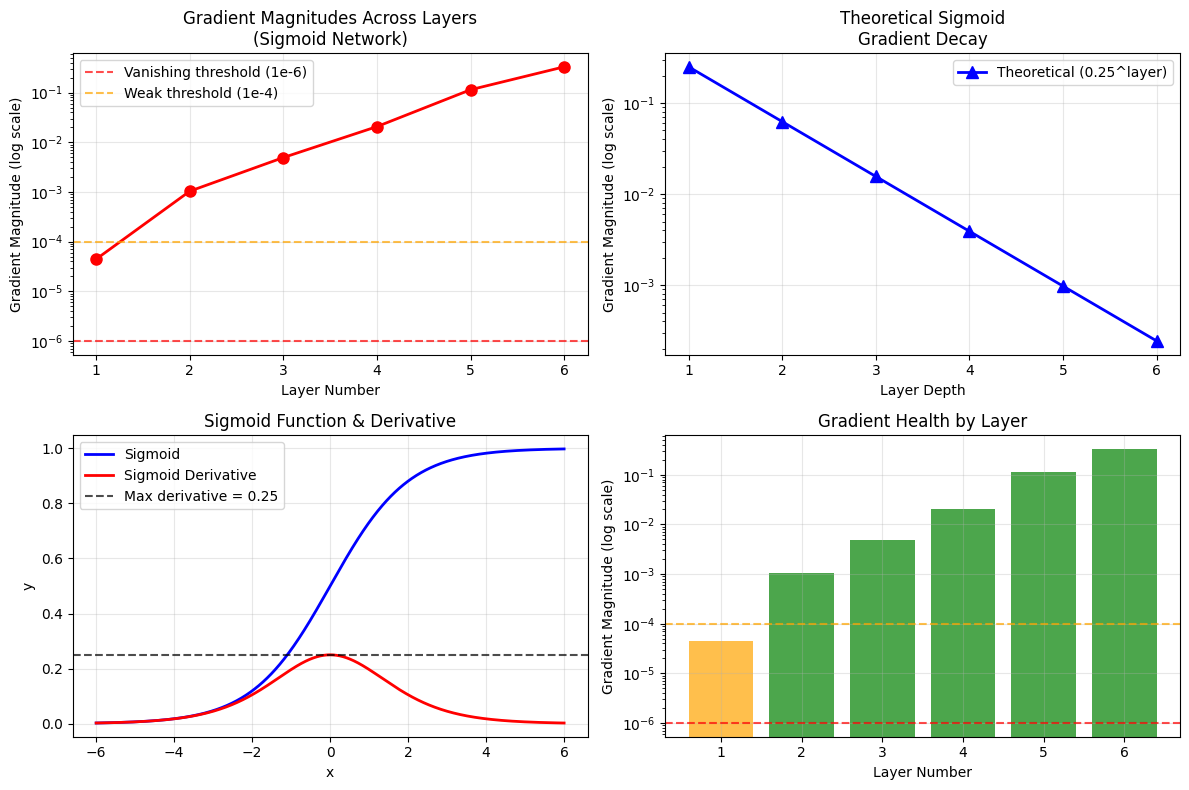

In [3]:
# Visualize the gradient magnitudes
plt.figure(figsize=(12, 8))

# Plot 1: Gradient magnitudes by layer
plt.subplot(2, 2, 1)
layers = list(range(1, len(gradient_norms) + 1))
plt.semilogy(layers, gradient_norms, 'ro-', linewidth=2, markersize=8)
plt.axhline(y=1e-6, color='red', linestyle='--', alpha=0.7, label='Vanishing threshold (1e-6)')
plt.axhline(y=1e-4, color='orange', linestyle='--', alpha=0.7, label='Weak threshold (1e-4)')
plt.xlabel('Layer Number')
plt.ylabel('Gradient Magnitude (log scale)')
plt.title('Gradient Magnitudes Across Layers\n(Sigmoid Network)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Theoretical sigmoid derivative decay
plt.subplot(2, 2, 2)
theoretical_decay = [0.25**i for i in layers]
plt.semilogy(layers, theoretical_decay, 'b^-', linewidth=2, markersize=8, label='Theoretical (0.25^layer)')
plt.xlabel('Layer Depth')
plt.ylabel('Gradient Magnitude (log scale)')
plt.title('Theoretical Sigmoid\nGradient Decay')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Sigmoid function and its derivative
plt.subplot(2, 2, 3)
x = np.linspace(-6, 6, 1000)
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_deriv = sigmoid * (1 - sigmoid)

plt.plot(x, sigmoid, 'b-', linewidth=2, label='Sigmoid')
plt.plot(x, sigmoid_deriv, 'r-', linewidth=2, label='Sigmoid Derivative')
plt.axhline(y=0.25, color='k', linestyle='--', alpha=0.7, label='Max derivative = 0.25')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function & Derivative')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Comparison bar chart
plt.subplot(2, 2, 4)
colors = ['red' if g < 1e-6 else 'orange' if g < 1e-4 else 'green' for g in gradient_norms]
plt.bar(layers, gradient_norms, color=colors, alpha=0.7)
plt.yscale('log')
plt.axhline(y=1e-6, color='red', linestyle='--', alpha=0.7)
plt.axhline(y=1e-4, color='orange', linestyle='--', alpha=0.7)
plt.xlabel('Layer Number')
plt.ylabel('Gradient Magnitude (log scale)')
plt.title('Gradient Health by Layer')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [4]:
# Mathematical analysis of the vanishing gradient problem
print("🧮 MATHEMATICAL ANALYSIS:")
print("=" * 50)

# Sigmoid derivative maximum
x = np.linspace(-10, 10, 1000)
sigmoid_deriv = (1 / (1 + np.exp(-x))) * (1 - (1 / (1 + np.exp(-x))))
max_deriv = np.max(sigmoid_deriv)

print(f"Maximum sigmoid derivative: {max_deriv:.6f}")
print(f"This occurs at x = 0")
print()

print("Gradient reduction through layers (theoretical):")
for layer in range(1, 11):
    reduction = max_deriv ** layer
    print(f"Layer {layer:2d}: Gradient = {reduction:.2e} ({reduction/1.0*100:.6f}% of original)")

print()
print("💡 KEY INSIGHTS:")
print("1. Each sigmoid layer can reduce gradient by up to 75% (multiply by 0.25)")
print("2. After 5 layers: gradient is ~0.1% of original")
print("3. After 10 layers: gradient is ~0.0001% of original")
print("4. Early layers receive almost no learning signal!")

🧮 MATHEMATICAL ANALYSIS:
Maximum sigmoid derivative: 0.249994
This occurs at x = 0

Gradient reduction through layers (theoretical):
Layer  1: Gradient = 2.50e-01 (24.999374% of original)
Layer  2: Gradient = 6.25e-02 (6.249687% of original)
Layer  3: Gradient = 1.56e-02 (1.562383% of original)
Layer  4: Gradient = 3.91e-03 (0.390586% of original)
Layer  5: Gradient = 9.76e-04 (0.097644% of original)
Layer  6: Gradient = 2.44e-04 (0.024410% of original)
Layer  7: Gradient = 6.10e-05 (0.006102% of original)
Layer  8: Gradient = 1.53e-05 (0.001526% of original)
Layer  9: Gradient = 3.81e-06 (0.000381% of original)
Layer 10: Gradient = 9.53e-07 (0.000095% of original)

💡 KEY INSIGHTS:
1. Each sigmoid layer can reduce gradient by up to 75% (multiply by 0.25)
2. After 5 layers: gradient is ~0.1% of original
3. After 10 layers: gradient is ~0.0001% of original
4. Early layers receive almost no learning signal!


---

## 🔍 Analysis Questions

1. **Which layers are most affected by vanishing gradients?**
   - The earliest layers (closer to input) suffer most
   - Later layers (closer to output) retain stronger gradients

2. **Why does this happen mathematically?**
   - Chain rule multiplies many small derivatives together
   - Sigmoid derivative max = 0.25
   - Multiple 0.25 factors → exponential decay

3. **What are the practical consequences?**
   - Early layers learn very slowly or not at all
   - Network capacity is wasted
   - Training becomes ineffective

---

## 💡 Key Takeaways

1. **Sigmoid activation** causes systematic gradient reduction
2. **Deep networks** amplify this problem exponentially
3. **Early layers** are most affected (furthest from output)
4. **Mathematical understanding** helps predict the problem
5. **Alternative solutions** are needed (hint: ReLU!)

---

## 🎯 Next Steps

In the next notebook, we'll explore:
- **Gradient health monitoring** techniques
- **Automated detection** of vanishing gradients
- **Diagnostic tools** for network analysis

---

*This notebook demonstrates Concept 1 of Week 5: Deep Neural Network Architectures*